In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import nnls
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

In [2]:
all_AAs=['a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'p','q', 'r', 's', 't', 'v', 'w', 'y']
b=np.array(pd.read_csv("yvals.csv")).ravel()
A=np.array(pd.read_csv("coeff.csv")).ravel().reshape(20,b.shape[0]).transpose()
A.shape

(568, 20)

In [3]:
def plots(ypred,ci):
    plt.figure(figsize=(12,5))
    plt.bar(range(20),[int(sum(A[:,i]/(A[:,i]+0.00000000001))) for i in range(20)]) #sum(A)
    plt.xlim([-1,20])
    plt.xticks(list(range(-1,20)),[" "]+all_AAs)
    plt.show()

    plt.figure(figsize=(12,5))
    plt.bar(range(20),ci,color =['m']*20)
    plt.xlim([-1,20])
    plt.xticks(list(range(-1,20)),[" "]+all_AAs)
    plt.hlines(xmin=0,xmax=20,y=ci[4])
    plt.show()

    plt.scatter(b,ypred,c='k',alpha=0.7)
    plt.plot(b,b,c='r',ls="-.")
    print("corr",np.corrcoef(b,ypred)[0][1])
    print("R2",r2_score(b,ypred))

In [4]:
# sol=nnls(A, b,maxiter=1000000000)[0]
# ## ci 95%
# ypred=np.dot(A,sol)
# sigma=sum([ (b[index]-x)**2 for index,x in enumerate(ypred)])/(len(ypred)-20-1)
# cov=np.linalg.inv(np.matmul(A.transpose(),A))
# var=[sigma*cov[x][x] for x in range(20)] 
# ci=[1.96*(var[i]**0.5) for i in range(20)]

# res=pd.DataFrame()
# res["aa"]=all_AAs
# res["val"]=sol
# res["ci"]=ci

# plots(ypred,ci)

# res    


NNLS R2 score 0.8876526585855993


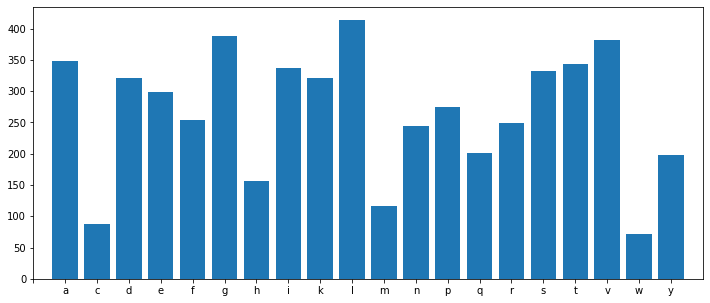

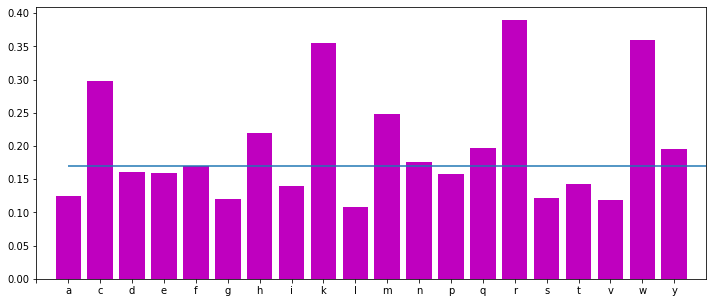

corr 0.9421532033515568
R2 0.8876526585855993


,aa,val,ci
0,a,3.277736,0.125291
1,c,1.689200,0.297651
2,d,2.901404,0.160945
3,e,4.083561,0.159116
4,f,0.370863,0.170018
5,g,1.851408,0.119904
6,h,1.998163,0.219852
7,i,0.686656,0.139096
8,k,0.275392,0.355766
9,l,0.827029,0.108688


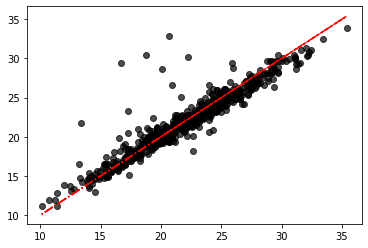

In [5]:
from sklearn.linear_model import LinearRegression
from scipy import stats
reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(A, b).predict(A)
r2_score_nnls = r2_score(b, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

coefficients = reg_nnls.coef_
mse_resid = np.mean((y_pred_nnls - b) ** 2)

#===========================


dof = A.shape[0]-20
mse = np.sum((b - reg_nnls.predict(A)) ** 2) / dof
var_params = np.diag(np.linalg.inv(A.T.dot(A)))
t_val = stats.t.isf(0.05/2, dof)
ci = t_val * np.sqrt(mse * var_params)

ci


res=pd.DataFrame()
res["aa"]=all_AAs
res["val"]=coefficients
res["ci"]=ci
plots(reg_nnls.predict(A),ci)
res